In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer.data.shape

(569, 30)

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

(569, 30)
(569, 2)


Text(0, 0.5, 'second principal component')

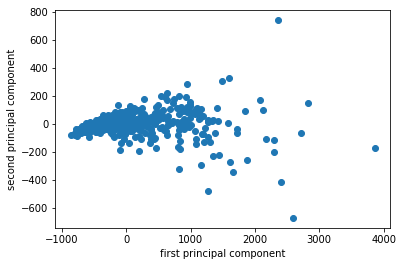

In [5]:
from sklearn.decomposition import PCA
print(cancer.data.shape)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(cancer.data)
print(X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("first principal component")
plt.ylabel("second principal component")

Text(0, 0.5, 'second principal component')

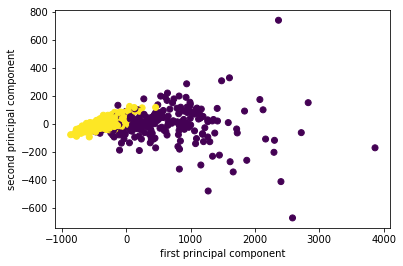

In [6]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

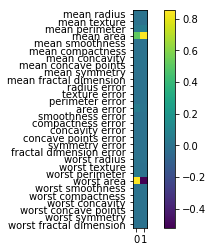

In [7]:
components = pca.components_
plt.imshow(components.T)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.colorbar()
plt.savefig("images/pca-for-visualization-components-color-bar.png")

Text(0, 0.5, 'second principal component')

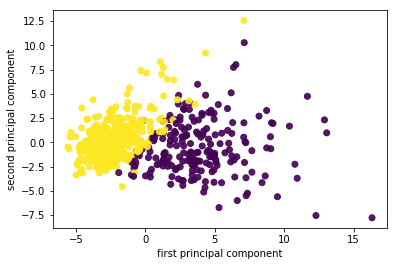

In [8]:
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled.fit_transform(cancer.data)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=cancer.target, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

In [9]:
pca.components_

array([[ 0.005,  0.002,  0.035,  0.517,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   , -0.   ,  0.   , -0.   ,  0.002,  0.056, -0.   ,  0.   ,
         0.   ,  0.   , -0.   , -0.   ,  0.007,  0.003,  0.049,  0.852,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.009, -0.003,  0.063,  0.852, -0.   , -0.   ,  0.   ,  0.   ,
        -0.   , -0.   , -0.   ,  0.   ,  0.001,  0.008,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   , -0.001, -0.013, -0.   , -0.52 ,
        -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ]])

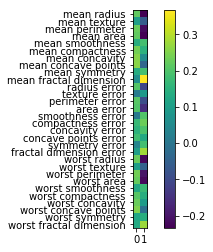

In [10]:
components = pca_scaled.named_steps['pca'].components_
plt.imshow(components.T)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.colorbar()
plt.savefig("images/inspecting-pca-scaled-components.png")

Text(0, 0.5, 'second principal component')

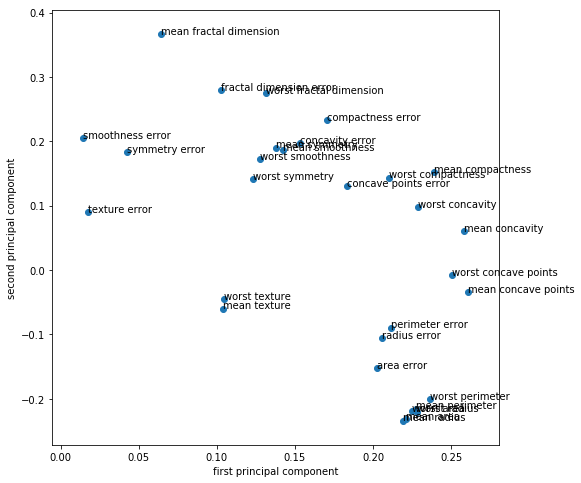

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(components[0], components[1])
for i, feature_contribution in enumerate(components.T):
    plt.annotate(cancer.feature_names[i], feature_contribution)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [14]:
lr = LogisticRegression(C=10000).fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9929577464788732
0.9440559440559441


/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(C=10000))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.960093896713615
0.9230769230769231


/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
X_train.shape

(426, 30)

In [17]:
pca.explained_variance_ratio_.shape

(2,)

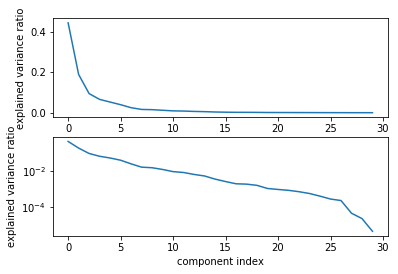

In [18]:
pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(X_train, y_train)
pca = pca_scaled.named_steps['pca']

fig, axes = plt.subplots(2)
axes[0].plot(pca.explained_variance_ratio_)
axes[1].semilogy(pca.explained_variance_ratio_)
for ax in axes:
    ax.set_xlabel("component index")
    ax.set_ylabel("explained variance ratio")

In [19]:
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=6), LogisticRegression(C=10000))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.9812206572769953
0.958041958041958


/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
pca = pca_lr.named_steps['pca']
lr = pca_lr.named_steps['logisticregression']

In [21]:
coef_pca = pca.inverse_transform(lr.coef_)

In [22]:
scaled_lr = make_pipeline(StandardScaler(), LogisticRegression(C=1))
scaled_lr.fit(X_train, y_train)

/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))])

In [23]:
coef_no_pca = scaled_lr.named_steps['logisticregression'].coef_

Text(0, 0.5, 'coefficient value')

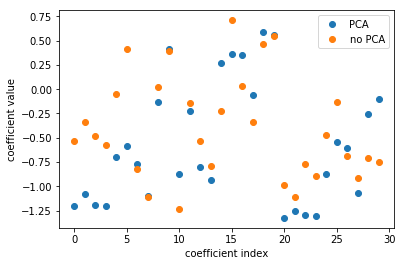

In [24]:
plt.plot(coef_pca.ravel(), 'o', label="PCA")
plt.plot(coef_no_pca.ravel(), 'o', label="no PCA")
plt.legend()
plt.xlabel("coefficient index")
plt.ylabel("coefficient value")

Text(0, 0.5, 'PCA coefficient')

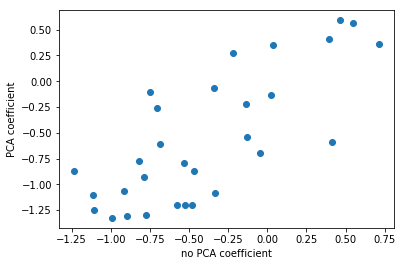

In [25]:
plt.plot(coef_no_pca.ravel(), coef_pca.ravel(), 'o')
plt.xlabel("no PCA coefficient")
plt.ylabel("PCA coefficient")

In [26]:
rng = np.random.RandomState(0)
X = rng.normal(size=(100, 3))
y = X[:, 0] > 0
X *= np.array((1, 15, 20))
X = np.dot(X, rng.normal(size=(3, 3)))

Text(0.5, 0.98, 'Data')

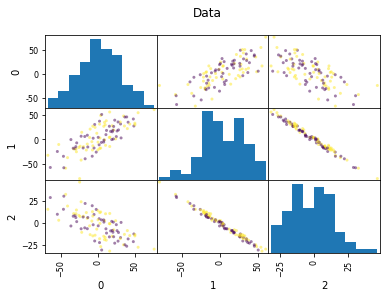

In [27]:
pd.plotting.scatter_matrix(pd.DataFrame(X), c=y)
plt.suptitle("Data")

Text(0.5, 0.98, 'Principal Components')

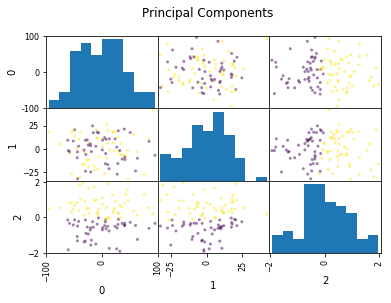

In [28]:
X_pca = PCA().fit_transform(X)
pd.plotting.scatter_matrix(pd.DataFrame(X_pca), c=y)
plt.suptitle("Principal Components")

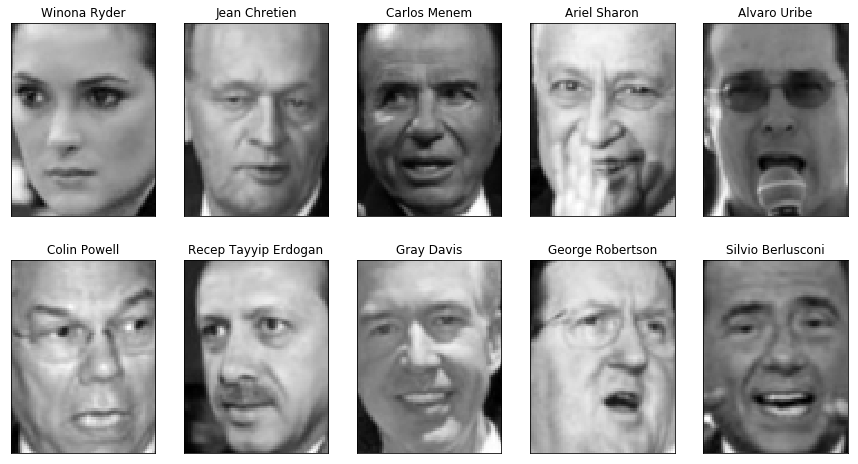

In [29]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])

In [30]:
# have at most 50 images per preson - otherwise too much bush
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
print(X_train.shape)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

(1547, 5655)
Test set score of 1-nn: 0.23


In [32]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


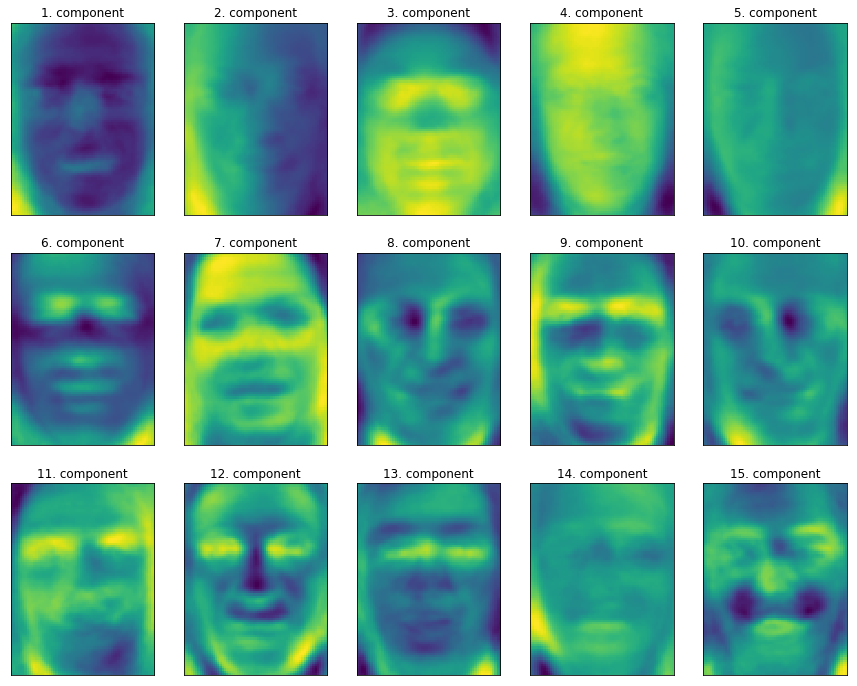

In [34]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
    cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

In [35]:
pca = PCA(n_components=100).fit(X_train)

In [36]:
reconstruction_errors = np.sum((X_test - pca.inverse_transform(pca.transform(X_test))) ** 2, axis=1)

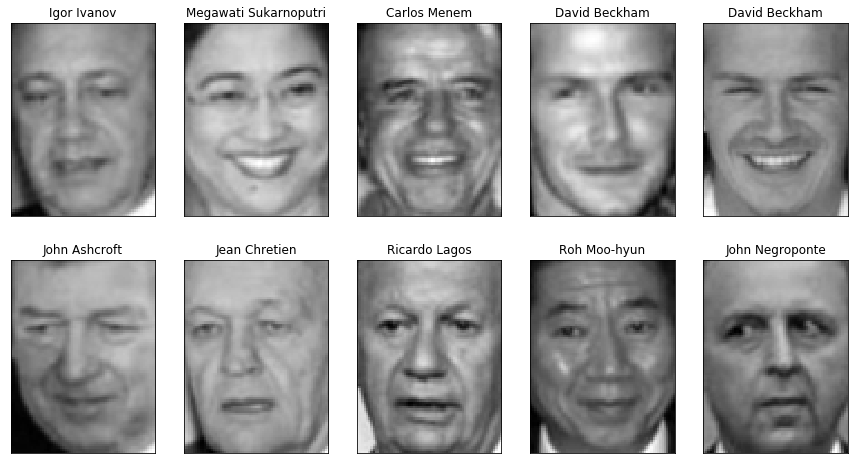

In [37]:
inds = np.argsort(reconstruction_errors)
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y_test[inds], X_test[inds], axes.ravel()):
    ax.imshow(image.reshape(image_shape), cmap='gray')
    ax.set_title(people.target_names[target])

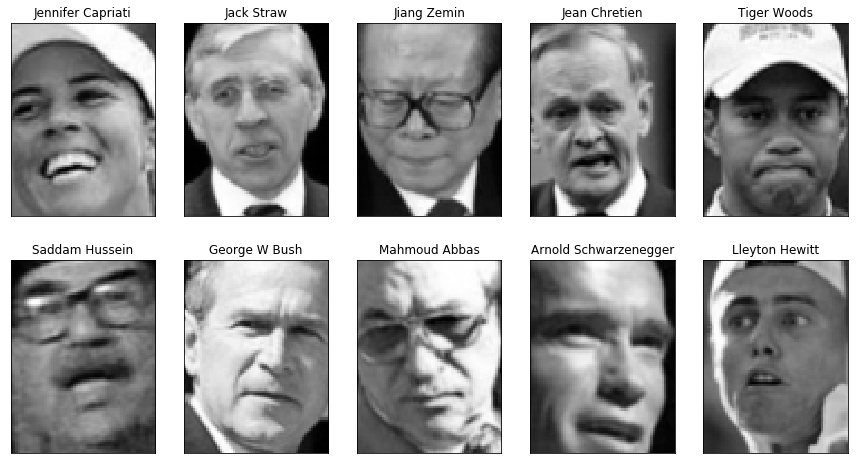

In [38]:
inds = np.argsort(reconstruction_errors)[::-1]
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y_test[inds], X_test[inds], axes.ravel()):
    ax.imshow(image.reshape(image_shape), cmap='gray')
    ax.set_title(people.target_names[target])

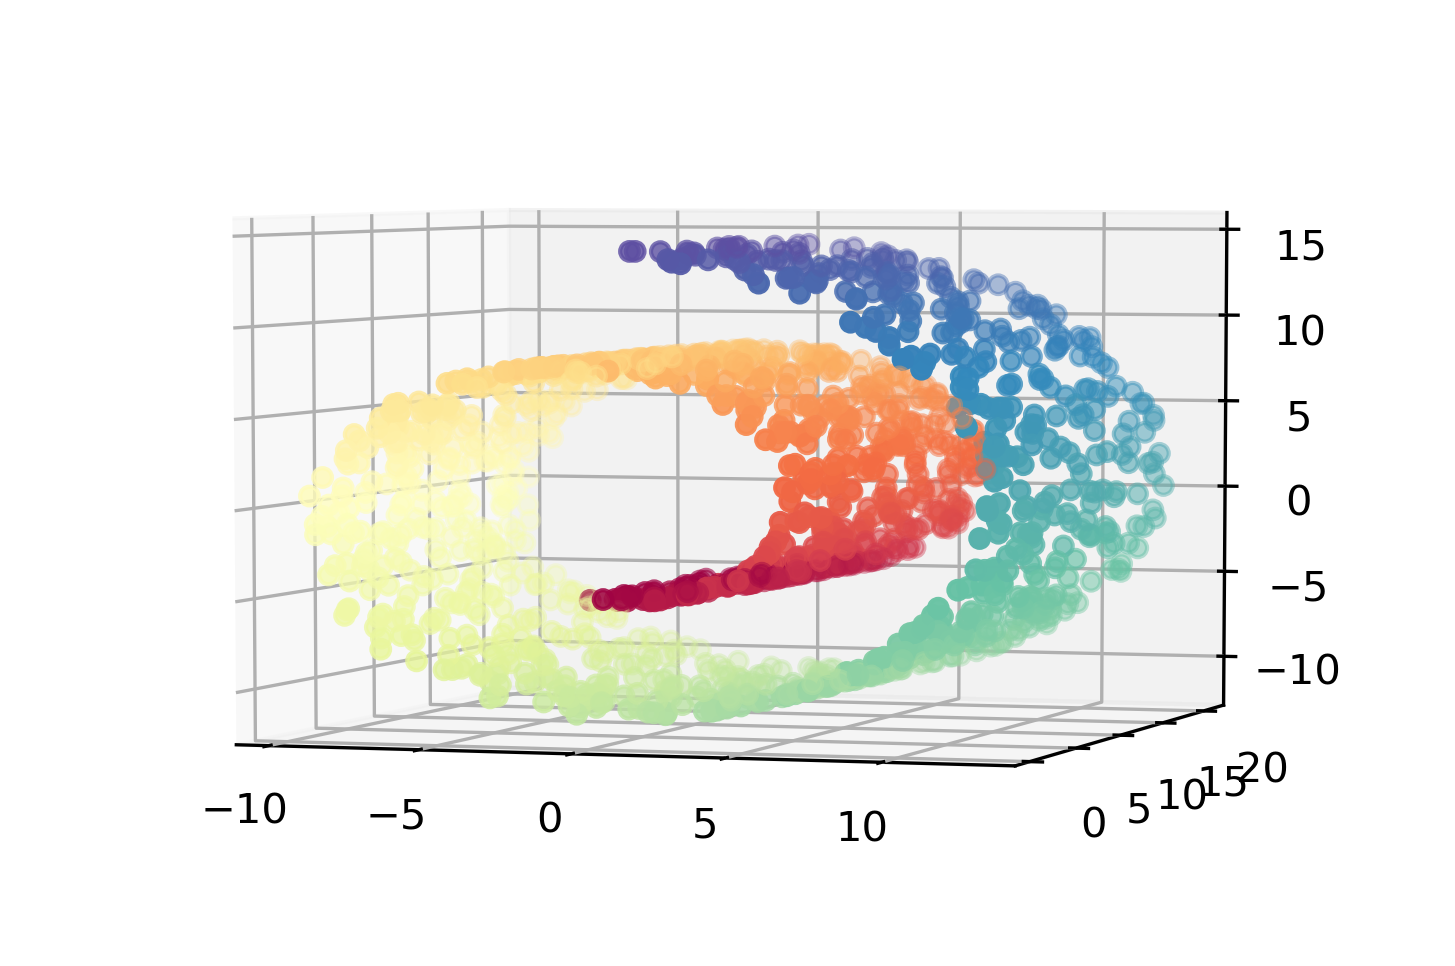

In [42]:
# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D

#----------------------------------------------------------------------
# Locally linear embedding of the swiss roll

from sklearn import manifold, datasets
X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.savefig("images/manifold-learning-structure.png", bbox_inches="tight", dpi=500)

In [60]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data / 16.

In [61]:
X_tsne = TSNE().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

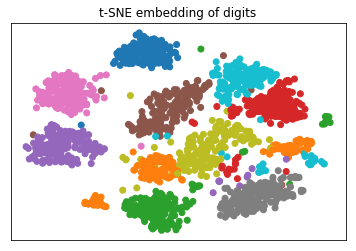

In [66]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=plt.cm.Vega10(digits.target))
plt.title("t-SNE embedding of digits")
plt.xticks(())
plt.yticks(())
plt.savefig("images/tsne-digits.png")

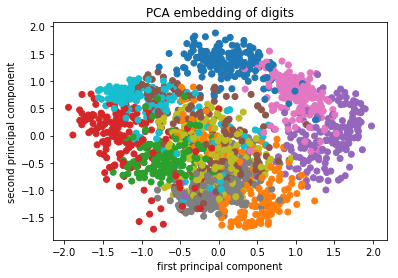

In [67]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=plt.cm.Vega10(digits.target))
plt.title("PCA embedding of digits")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.savefig("images/pca-digits.png")

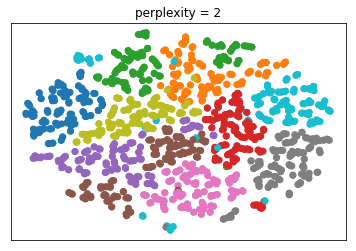

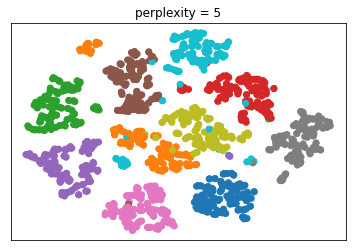

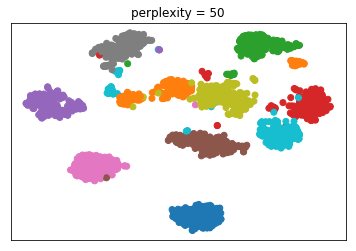

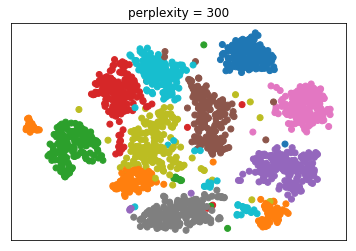

In [69]:
for perplexity in [2, 5, 50, 300]:
    plt.figure()
    plt.xticks(())
    plt.yticks(())
    X_tsne = TSNE(perplexity=perplexity).fit_transform(X)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=plt.cm.Vega10(digits.target))
    plt.title("perplexity = {}".format(perplexity))
    plt.savefig("images/tsne-tuning-{}".format(perplexity))

Computing t-SNE embedding


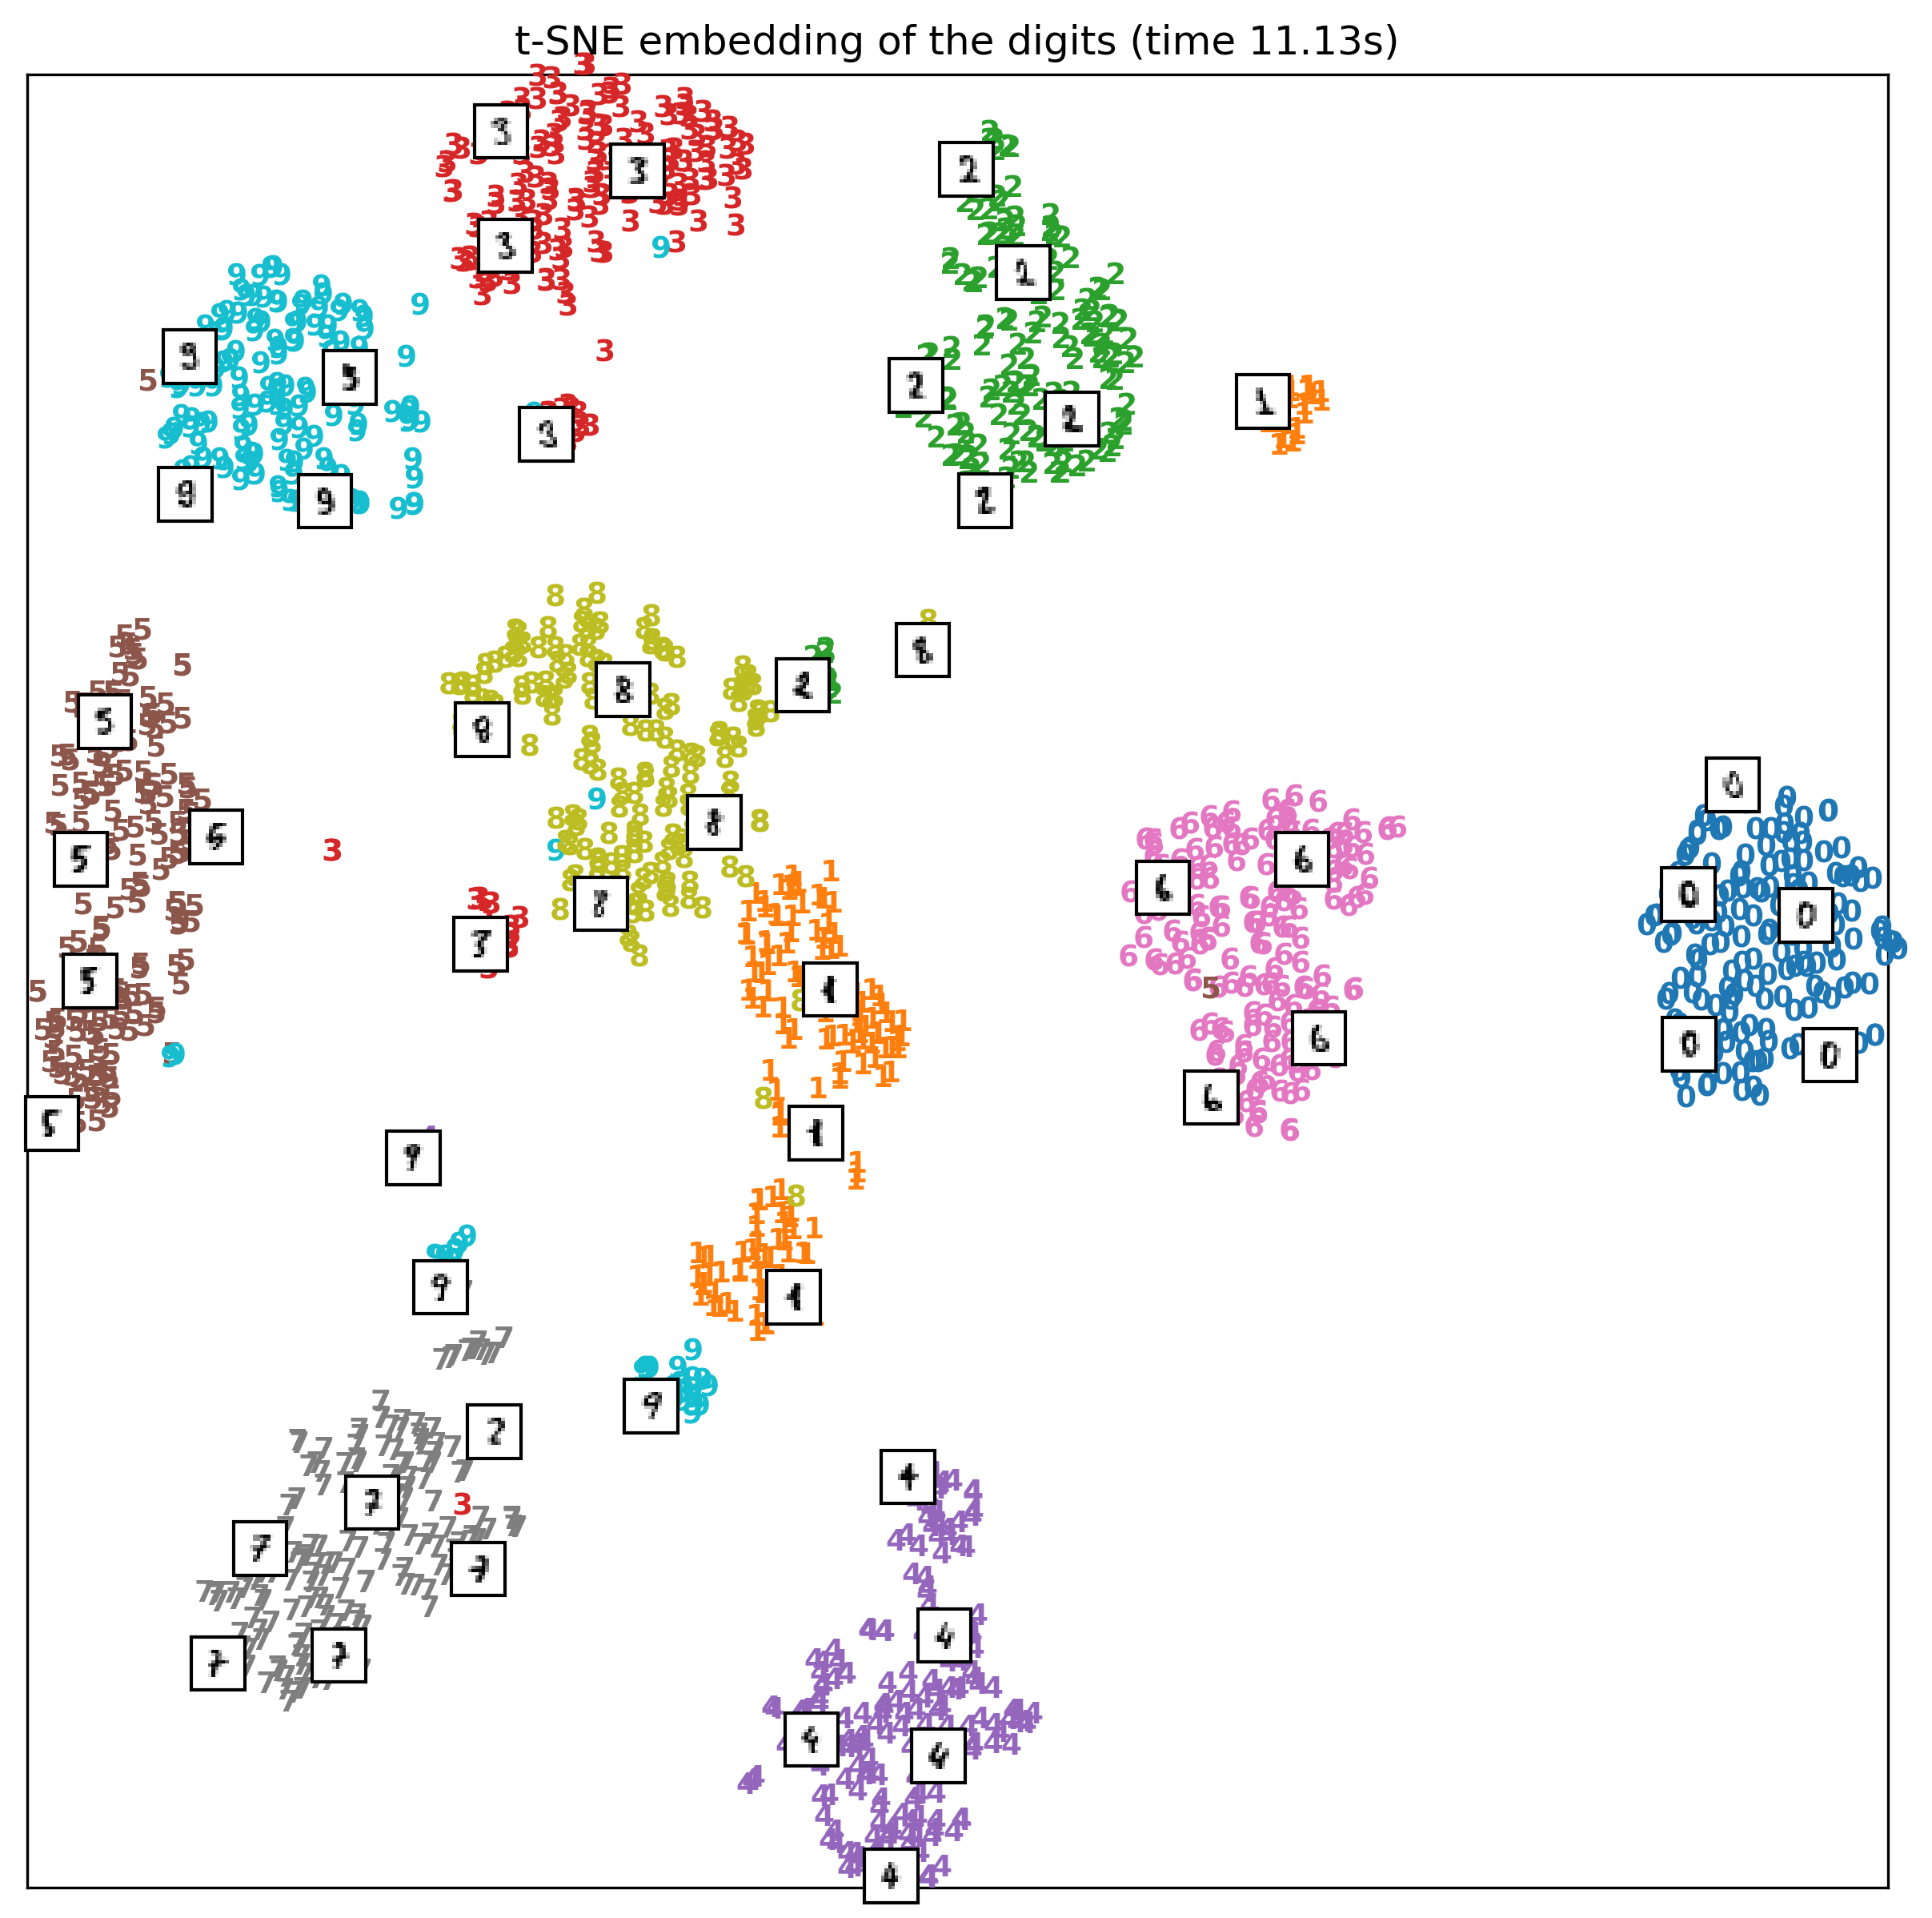

In [56]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(dpi=300, figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Vega10(y[i]),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.savefig("images/tsne-embeddings-digits.png")

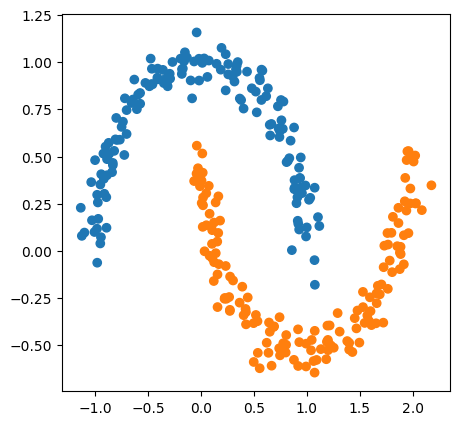

In [271]:
from sklearn.datasets import make_moons
plt.figure(figsize=(5, 5))
X, y = make_moons(n_samples=300, noise=.07, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y))

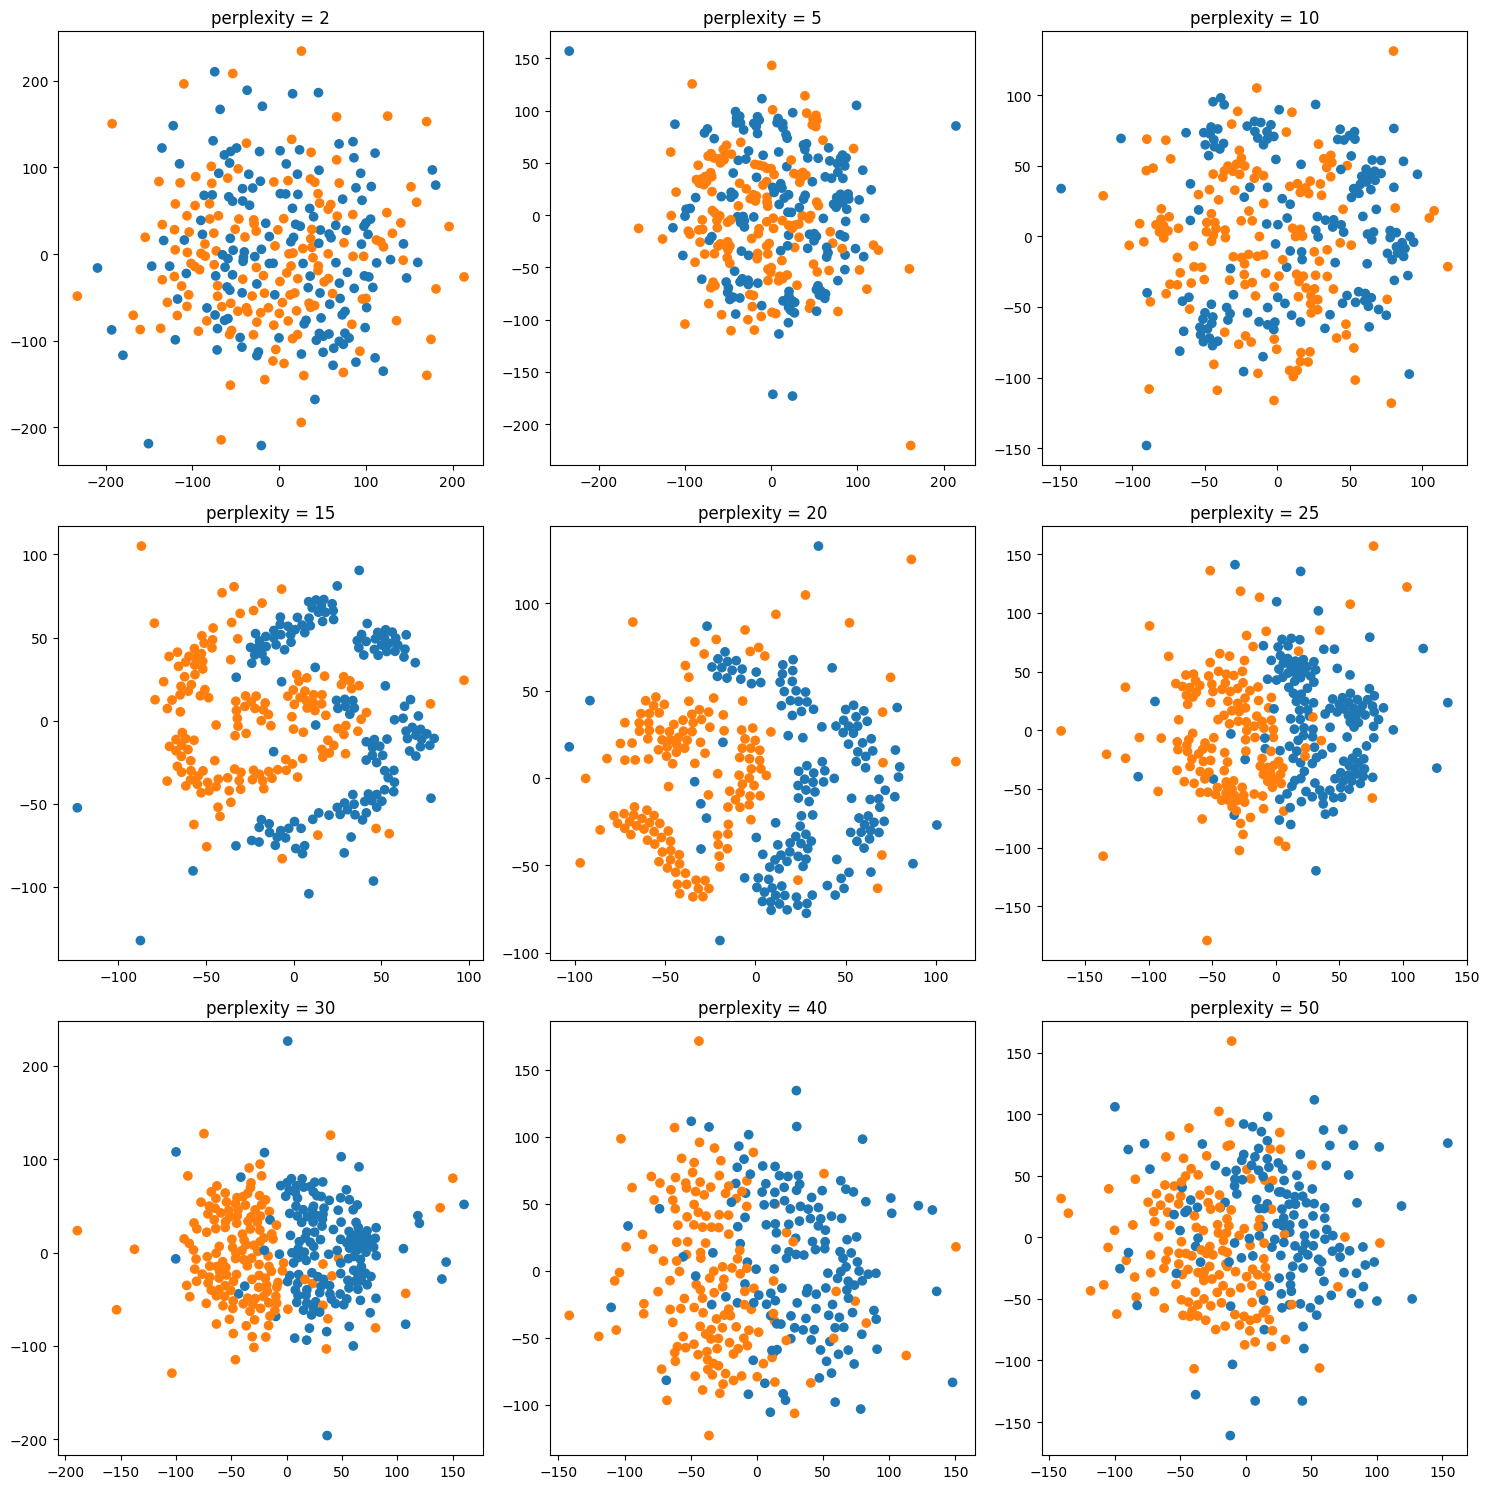

In [269]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for ax, perplexity in zip(axes.ravel(), [2, 5, 10, 15, 20, 25, 30, 40, 50]):
    X_tsne = TSNE(perplexity=perplexity, random_state=0).fit_transform(X)
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=plt.cm.Vega10(y))
    ax.set_title("perplexity = {}".format(perplexity))
fig.tight_layout()

# Discriminant Analysis

In [294]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


Linear and Quadratic Discriminant Analysis with covariance ellipsoid

This example plots the covariance ellipsoids of each class and
decision boundary learned by LDA and QDA. The ellipsoids display
the double standard deviation for each class. With LDA, the
standard deviation is the same for all the classes, while each
class has its own standard deviation with QDA.



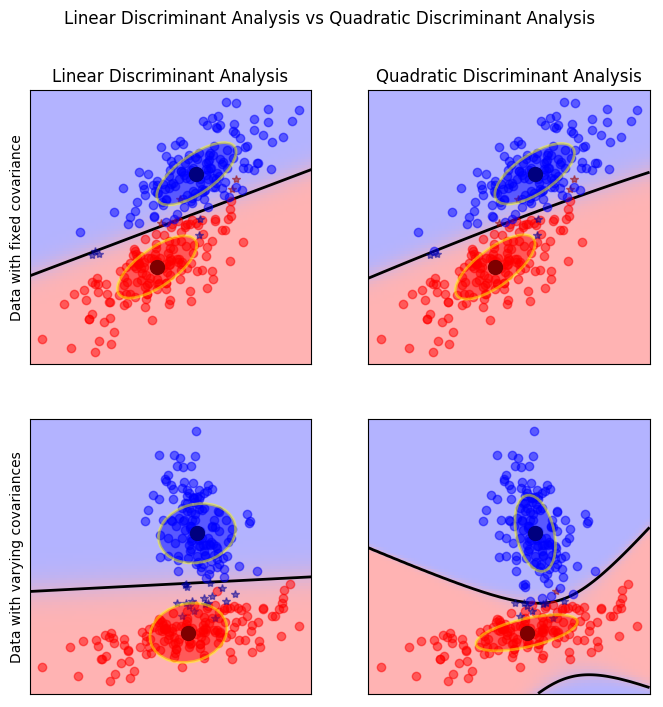

In [308]:
"""
====================================================================
Linear and Quadratic Discriminant Analysis with covariance ellipsoid
====================================================================

This example plots the covariance ellipsoids of each class and
decision boundary learned by LDA and QDA. The ellipsoids display
the double standard deviation for each class. With LDA, the
standard deviation is the same for all the classes, while each
class has its own standard deviation with QDA.
"""
print(__doc__)

from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

###############################################################################
# colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


###############################################################################
# generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 150, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 150, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 15])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


###############################################################################
# plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10)
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10)
    plt.gca().set_aspect("equal")
    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color, edgecolor='yellow',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariances_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariances_[1], 'blue')

plt.figure(figsize=(8, 8))
###############################################################################
for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariances=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis')
plt.show()

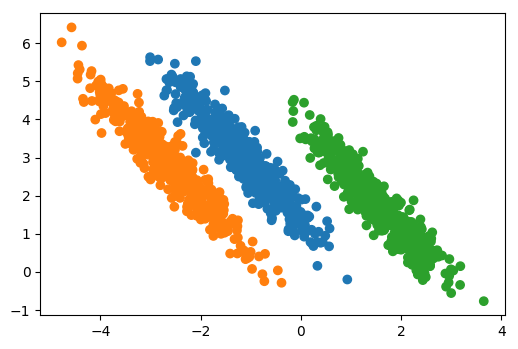

In [325]:
from sklearn.datasets import make_blobs
n_samples = 1500
random_state = 3
X_, y = make_blobs(n_samples=n_samples, centers=3, random_state=random_state)

transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X = np.dot(X_, transformation)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y))

In [326]:
X_pca = PCA(whiten=True).fit_transform(X)

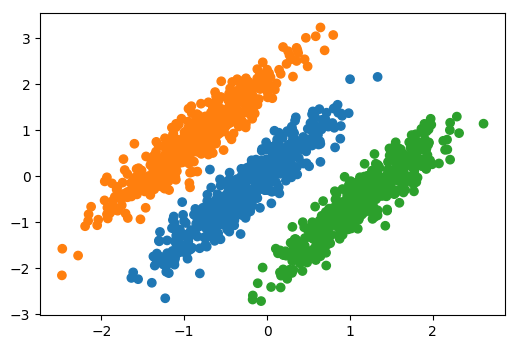

In [327]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=plt.cm.Vega10(y))

In [328]:
lda = LinearDiscriminantAnalysis().fit(X, y)
X_lda = lda.transform(X)

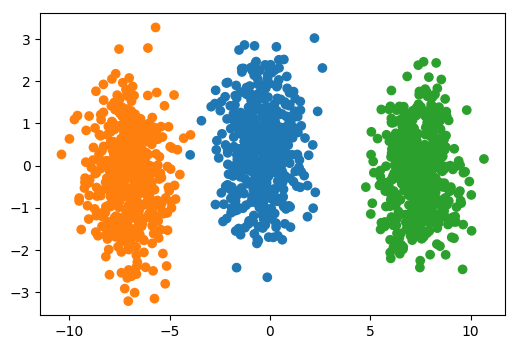

In [329]:
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=plt.cm.Vega10(y))

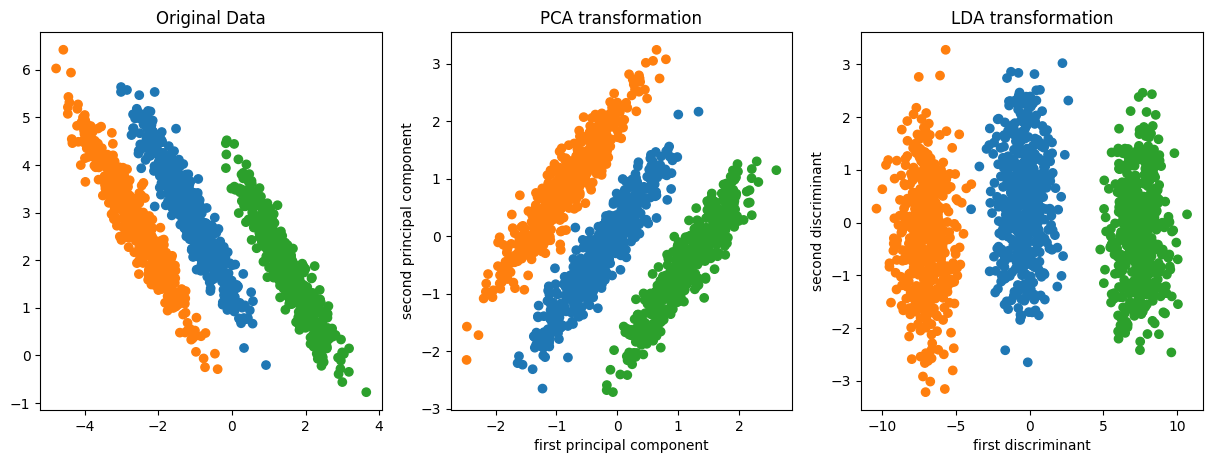

In [332]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].set_title("Original Data")
ax[0].scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y))
ax[1].set_title("PCA transformation")
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=plt.cm.Vega10(y))
ax[1].set_xlabel("first principal component")
ax[1].set_ylabel("second principal component")
ax[2].scatter(X_lda[:, 0], X_lda[:, 1], c=plt.cm.Vega10(y))
ax[2].set_title("LDA transformation")
ax[2].set_xlabel("first discriminant")
ax[2].set_ylabel("second discriminant")

In [334]:
rng = np.random.RandomState(0)
X = rng.normal(size=(100, 3))
y = X[:, 0] > 0
X *= np.array((1, 15, 20))
X = np.dot(X, rng.normal(size=(3, 3)))
lda = LinearDiscriminantAnalysis().fit(X, y)
lda_direction = lda.transform(X)

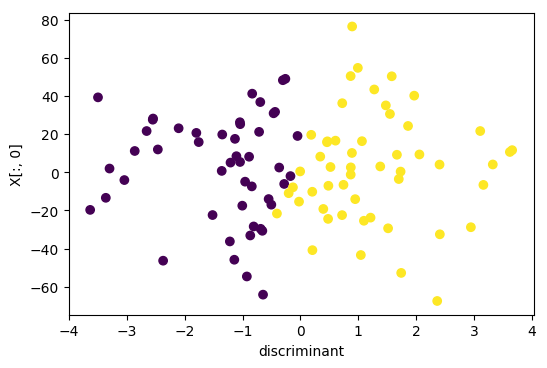

In [343]:
plt.scatter(lda_direction.ravel(), X[:, 0], c=y)
plt.xlabel("discriminant")
plt.ylabel("X[:, 0]")

In [347]:
X_lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(digits.data / 16., digits.target)

/home/andy/checkout/scikit-learn/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


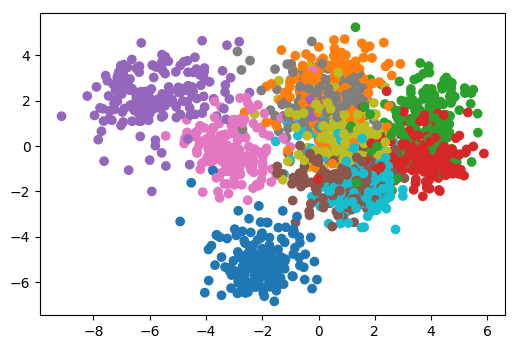

In [348]:
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=plt.cm.Vega10(digits.target))
